In [ ]:
# Import Main Dependencies
import pandas as pd
import json
import requests
from pprint import pprint
import datetime as dt
import matplotlib.pyplot as plt
#import scipy.stats as st

# Import credentials string for PostgreSQL database access
from config import credentials

# Library and methods to connect and interact with database
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session
from sqlalchemy.orm import sessionmaker

#import geoapify api key
#from config_api import geoapify_api_key


# Getting Lobbyist Data using API calls

In [ ]:
# API Call 1: Get full dataset

# save endpoint url - all records
url_two = 'https://data.cityofchicago.org/resource/p9p7-vfqc.json?$limit=10000'

# save endpoint response in json format
api_full_response_two = requests.get(url_two).json()

In [ ]:
# API Call 1 - Contribution table: loop and store response

# Creating empty list to store response
lobbyist_combo_list_two = []

#looping through all api response to extract fields 
for lobbyist_record in api_full_response_two:
    
    #try/except logic to avoid errors
    try:
        contribution_id = lobbyist_record['contribution_id']
        period_start = lobbyist_record['period_start']
        period_end = lobbyist_record['period_end']
        contribution_date = lobbyist_record['contribution_date']
        recipient = lobbyist_record['recipient']
        amount = lobbyist_record['amount']
        lobbyist_id = lobbyist_record['lobbyist_id']
        lobbyist_first_name = lobbyist_record['lobbyist_first_name']
        lobbyist_last_name = lobbyist_record['lobbyist_last_name']
        created_date = lobbyist_record['created_date']
        
        lobbyist_combo_list_two.append({"contribution_id" : contribution_id,
                        "period_start" : period_start,
                        "period_end": period_end,
                        "contribution_date" : contribution_date,
                        "recipient" : recipient,      
                        "amount" : amount,
                        "lobbyist_id" : lobbyist_id,      
                        "lobbyist_first_name" : lobbyist_first_name,
                        "lobbyist_last_name": lobbyist_last_name,
                        "created_date" : created_date,
                       
                        })
    
    except:
        print(f'found empty data for lobbyist name {lobbyist_last_name}')
        pass
        
    
    #print(lobbyist_last_name)
    
    # adding extracted data into python list 

    
print("Data Retrieval Complete")

In [ ]:
# API Call 2 - Compensation table: Get full dataset

# save endpoint url - all records
url = 'https://data.cityofchicago.org/resource/dw2f-w78u.json?$limit=30000'

# save endpoint response in json format
api_full_response = requests.get(url).json()

# pprint(json.dumps(api_full_response, indent=4, sort_keys=True))


In [ ]:
# API Call 2: loop and store response

# Creating empty list to store response
compensation_list = []

err_num = 0

#looping through all api data to extract fields
for compensation_record in api_full_response:
   
    #try/except logic to avoid errors
    try:
        client_id = compensation_record['client_id']
        client_name = compensation_record['client_name']
        compensation_amount = compensation_record['compensation_amount']
        compensation_id = compensation_record['compensation_id']
        lobbyist_first_name = compensation_record['lobbyist_first_name']
        lobbyist_id = compensation_record['lobbyist_id']
        lobbyist_last_name = compensation_record['lobbyist_last_name']
        lobbyist_middle_initial = compensation_record['lobbyist_middle_initial']
        period_end = compensation_record['period_end']
        period_start = compensation_record['period_start']
        
           
    # adding extracted data into python list
        compensation_list.append({"client_id" : client_id,
                        "client_name" : client_name,
                        "compensation_amount": compensation_amount,
                        "compensation_id" : compensation_id,
                        "lobbyist_first_name" : lobbyist_first_name,
                        "lobbyist_id" : lobbyist_id,
                        "lobbyist_last_name": lobbyist_last_name,
                        "lobbyist_middle_initial" : lobbyist_middle_initial,
                        "period_end" : period_end,
                        "period_start" : period_start,
                        })
       
    except:
        # print(f'found empty data for compensation ID {compensation_id}')
        err_num = err_num + 1
        pass

   
print(f"Data Retrieval Complete. {err_num} records had some missing data")


In [ ]:
# API Call 3: Get full dataset

# save endpoint url - all records
url = 'https://data.cityofchicago.org/resource/tq3e-t5yq.json?$limit=15000'

# save endpoint response in json format
api_packed_response = requests.get(url).json()


In [ ]:
# API Call 3 - Lobbyist table: loop and store response

# Creating empty list to store response
lobby_record_list = []

# looping through all api data to extract fields
for lobby_record in api_packed_response:
    
    #try/except logic to avoid errors
    try:
        address_1 = lobby_record['address_1']
        city = lobby_record['city']
        country = lobby_record['country']
        created_date = lobby_record['created_date']
        email = lobby_record['email']
        employer_id = lobby_record['employer_id']
        employer_name = lobby_record['employer_name']
        fax = lobby_record['fax']
        first_name = lobby_record['first_name']
        last_name = lobby_record['last_name']
        lobbyist_id = lobby_record['lobbyist_id']
        phone = lobby_record['phone']
        salutation = lobby_record['salutation']
        state =  lobby_record['state']
        year = lobby_record['year']
        zip = lobby_record['zip']
        
            # adding extracted data into python list
        lobby_record_list.append({"address_1" : address_1,
                              "city" : city,
                              "country" : country,
                              "created_date" : created_date,
                              "email" : email,
                              "employer_id" : employer_id,
                              "employer_name" : employer_name,
                              "fax" : fax,
                              "first_name" : first_name,
                              "last_name":  last_name,
                              "lobbyist_id" : lobbyist_id,
                              "phone": phone,
                              "salutation": salutation,
                              "state": state,
                              "year" : year,
                              "zip" : zip                        
                            })
                       
    except:
        #print(f'found empty data for lobbyist name {last_name}')
        pass
        


print("Data Retrieval Complete")

# inspect counts
# convert numeric types to int
# verify data types were converted to int

# Creating Dataframes for all Lobbyist datasets

## Lobbyists Dataframe

In [ ]:
# create Lobbyist dataframe 
lobby_record_df = pd.DataFrame(lobby_record_list)
lobby_record_df.head()

In [ ]:
# inspect counts to ensure all records retrieved (the limit in API Call must be higher than returned count here)
lobby_record_df.info()
# Daniel, notice the count is 5000 here.  API Limit needs to be increased. 

In [ ]:
# convert numeric types to int

lobby_record_df['year'] = lobby_record_df['year'].astype('int')
lobby_record_df['employer_id'] = lobby_record_df['employer_id'].astype('int64')
lobby_record_df['lobbyist_id'] = lobby_record_df['lobbyist_id'].astype('int')

# perform Dataframe date formatting (if necessary)

In [ ]:
# verify data types were converted to int
lobby_record_df.dtypes

In [ ]:

# drop unnecessary columns example
#lobby_record_no_dups_df = lobby_record_reordered_df.drop('lobbyist_id', axis=1)
#lobby_record_no_dups_df.head()
#TESTING

# for i in lobby_record_list:
#     print(i['address_1'])
    
# for x in lobby_record_df:
#     print(x)

lobby_record_df

In [ ]:
# Find duplicate IDs
#print(lobby_record_df.count())

#lobby_record_df['lobbyist_id'].duplicated()
lobby_record_df['lobbyist_id'].duplicated().sum()

# drop duplicate ids

## Contributions Dataframe

In [ ]:
# Create this dataset dataframe 
lobbyist_combo_df_two = pd.DataFrame(lobbyist_combo_list_two)
lobbyist_combo_df_two['period_end'] = pd.to_datetime(lobbyist_combo_df_two['period_end'])
lobbyist_combo_df_two['period_start'] = pd.to_datetime(lobbyist_combo_df_two['period_start'])
lobbyist_combo_df_two['contribution_date'] = pd.to_datetime(lobbyist_combo_df_two['contribution_date'],errors = "coerce")
lobbyist_combo_df_two['period_end']=lobbyist_combo_df_two['period_end'].dt.strftime('%m/%d/%y')
lobbyist_combo_df_two['period_start'] = lobbyist_combo_df_two['period_start'].dt.strftime('%m/%d/%y')
lobbyist_combo_df_two['contribution_date'] = lobbyist_combo_df_two['contribution_date'].dt.strftime('%m/%d/%y')
lobbyist_combo_df_two.head()

In [ ]:
lobbyist_combo_df_two['contribution_date'].isna().sum()

In [ ]:
# inspect data types
lobbyist_combo_df_two.info()

In [ ]:
# inspect counts
lobbyist_combo_df_two.count()

In [ ]:
# inspect counts to ensure all records are retrieved (the limit in API Call must be higher than returned count here)
lobbyist_combo_df_two.count()


In [ ]:
#  Which "Lobbyist" is receiving the most lobbying funds?
lobbyist_combo_df_two['lobbyist_id'] = lobbyist_combo_df_two['lobbyist_id'].astype(int)
lobbyist_combo_df_two['amount'] = lobbyist_combo_df_two['amount'].astype(float)
most_funds_received_lobbyist = lobbyist_combo_df_two.groupby(["lobbyist_last_name"])["amount"].sum()
lobbyist_high = most_funds_received_lobbyist.sort_values(ascending=False)
lobbyist_high =lobbyist_high.head(30)


In [ ]:
# inspect Contributions dataframe data types
lobbyist_combo_df_two.info()

Text(0, 0.5, 'lobbyist_high')

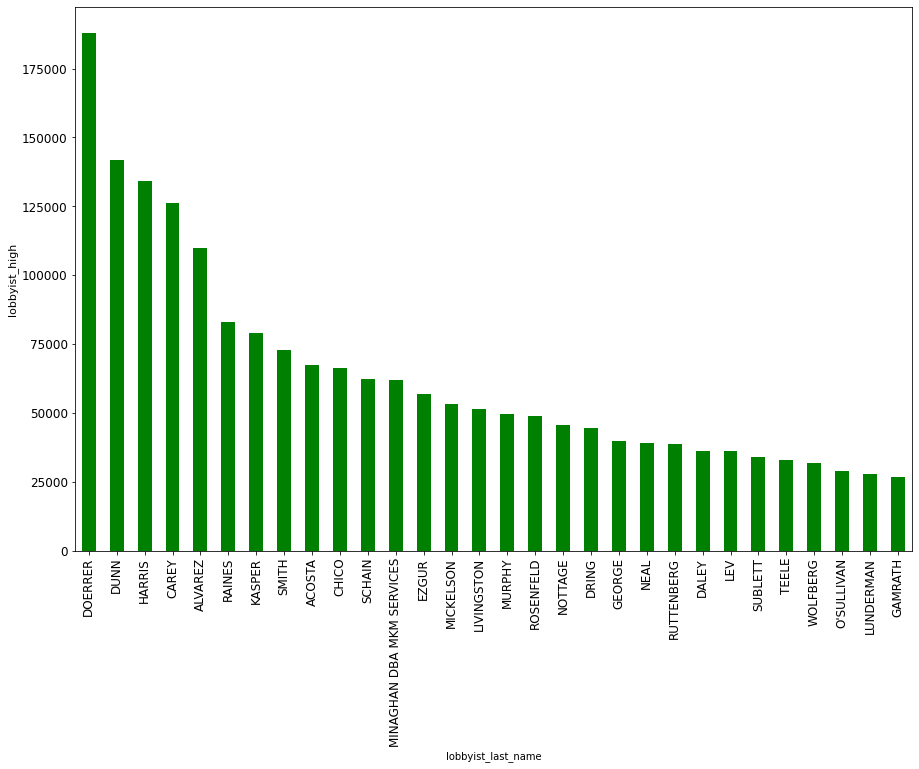

In [74]:
# Bar Plot (Using Pandas): lobbyist Vs amount
plot_pandas = lobbyist_high.plot.bar(figsize = (15,10), color = 'g', fontsize = 12)
plt.ylabel("lobbyist_high", fontsize =11)

In [ ]:
#  Which "recipient" is receiving the most lobbying funds in descending order
lobbyist_combo_df_two['amount'] = lobbyist_combo_df_two['amount'].astype(float)
most_funds_received_recipient = lobbyist_combo_df_two.groupby(["recipient"])["amount"].sum()
recipient_high = most_funds_received_recipient.sort_values(ascending=False)
recipient_high =recipient_high.head(30)

Text(0, 0.5, 'recipient_high')

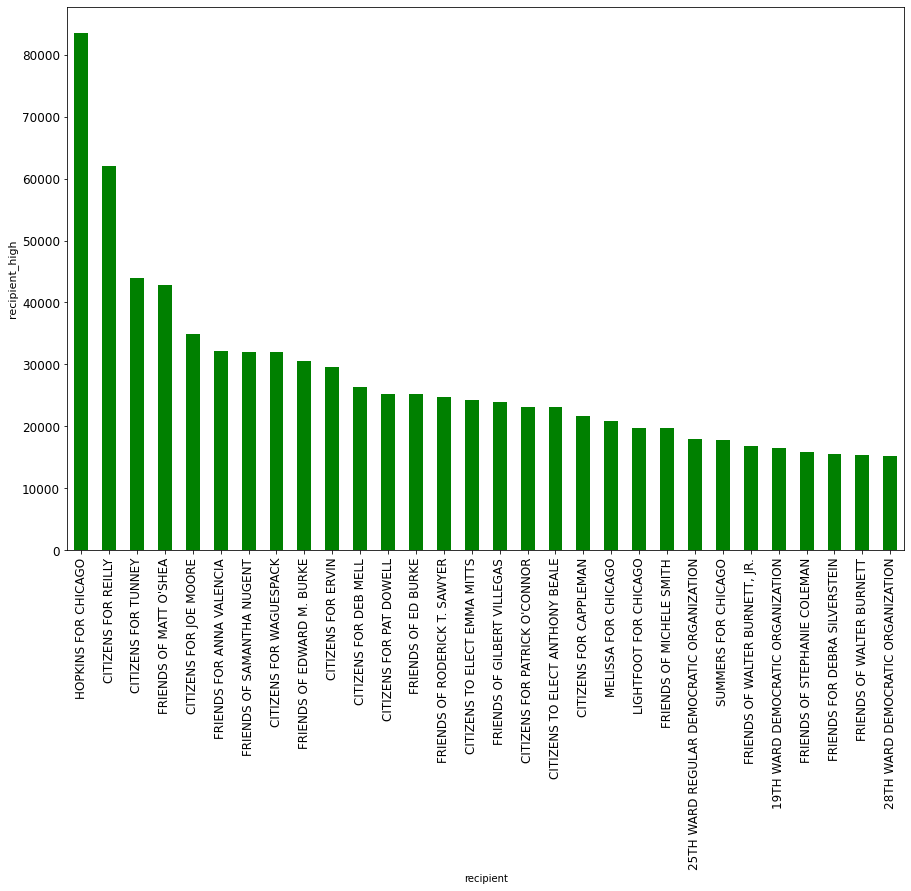

In [75]:
# Bar Plot (Using Pandas): recipient Vs amount
plot_pandas = recipient_high.plot.bar(figsize = (15,10), color = 'g', fontsize = 12)
plt.ylabel("recipient_high", fontsize =11)

In [ ]:
# Convert dataframe to json
lobbyist_combo_df_two.to_json('data/lobbyist_contribution_info.json',orient ='records')

# Write DF to json

# with open("data/compensation.json", "w") as outfile:
#     json.dump(compensation_df_to_json_dict, outfile)

## Compensation Dataframe

In [ ]:
# Create compensation dataframe
compensation_df = pd.DataFrame(compensation_list)
compensation_df.head()

In [ ]:
# Compensation Dataframe date formatting
compensation_df['period_end'] = pd.to_datetime(compensation_df['period_end'])
compensation_df['period_start'] = pd.to_datetime(compensation_df['period_start'])

compensation_df.head()

In [ ]:
# reorder fields in dataframe
compensation_df = compensation_df[['lobbyist_id', 'lobbyist_first_name','lobbyist_middle_initial','lobbyist_last_name',
                                   'client_id','client_name','compensation_id','compensation_amount','period_start','period_end']]

In [ ]:
# Compensation Dataframe Inspect counts
compensation_df.count()

In [ ]:
# Compensation Dataframe Inspect datatypes
compensation_df.info()

In [ ]:
# Compensation Dataframe update datatypes
compensation_df['compensation_amount'] = compensation_df['compensation_amount'].astype(float)

# Connect and load datasets into PostgreSQL Database

In [ ]:
# CONNECT TO POSTGRESQL DATABASE

# create connection string for accessing PostgreSQL database
conn_string = f"postgresql://{credentials}@localhost:5432/lobbyist_db"  

In [ ]:
# Create sqlalchemy engine using connection string
engine = create_engine(conn_string)
conn = engine.connect()

In [ ]:
# SAMPLE writing to file
# with open("sample.json", "w") as outfile:
#     json.dump(bulk_insert_dict, outfile)

In [ ]:
# Connect to the lobbyist_employer_client_rel table
table_name = 'lobbyist_employer_client_rel'
table_name2 = 'contribution'
table_name3 = 'compensation'
table_name4 = 'lobbyists'

metadata = sqlalchemy.schema.MetaData(bind=engine)

table1 = sqlalchemy.Table(table_name, metadata, autoload=True)
table2 = sqlalchemy.Table(table_name2, metadata, autoload=True)
table3 = sqlalchemy.Table(table_name3, metadata, autoload=True)
table4 = sqlalchemy.Table(table_name4, metadata, autoload=True)

In [ ]:
# start session
Session = sessionmaker(bind=engine)

In [ ]:
#Table 1
# Bulk Insert the dataframe into the database table

with Session() as session:
    lobbyist_combo_df_two.to_sql(table_name2, con=conn, if_exists='append', index=False)

In [ ]:
#Table 2
# Bulk Insert the dataframe into the database table

with Session() as session:
    compensation_df.to_sql(table_name3, con=conn, if_exists='append', index=False)

In [ ]:
#Table 3
# Bulk Insert the dataframe into the database table

with Session() as session:
    lobby_record_df.to_sql(table_name4, con=conn, if_exists='append', index=False)

In [ ]:
# Commit the changes
session.commit()

# close session
session.close()

# close connection
conn.close()

# Questions to analyze


## Are there certain geographic concentrations of lobbyists? - Lobbyist table

In [ ]:
# Reorder columns
lobby_record_reordered_df = lobby_record_df[['lobbyist_id', 'employer_id', 'year', 'email', 'first_name', 'last_name', 'address_1', 'city',
        'state', 'zip', 'country', 'phone', 'fax', 'employer_name']]
lobby_record_reordered_df.head()

In [ ]:
# print raw dataframe lobby record count (with duplicates)
print(lobby_record_reordered_df.count())

In [ ]:
# Look only at lobbyist records since the year 2019
lobby_record_filtered_df = lobby_record_reordered_df.loc[lobby_record_reordered_df["year"] >= 2019]
lobby_record_filtered_df.head()

In [ ]:
lobby_record_filtered_df.count()

In [ ]:
# print duplication of lobbyist records

# uncomment row below if want to see actual duplicates
#lobby_record_filtered_df['lobbyist_id'].duplicated()
print(f"Number of ducplicated records found in dataframe: {lobby_record_filtered_df['lobbyist_id'].duplicated().sum()}.")

lobbyist_final_df = lobby_record_filtered_df.drop_duplicates(subset='lobbyist_id')
lobbyist_final_df.count()

In [ ]:
lobbyist_final_df.head()

In [ ]:
# Group on city and count the number of lobbyists found in that region

df = lobbyist_final_df.groupby(lobbyist_final_df['city']) ['lobbyist_id'].count()

sortedDF=df.sort_values(ascending=False)

top_20_df = sortedDF.head(20)

#top_20_df.plot(kind="bar")

#plt.title("Greatest concentration of Lobyists by city ")
#plt.show()


top_20_df.head(20)

In [ ]:
import time
api_key = '&apiKey=bb91f4d4147f4742b8a772b098feea92'
#api_key = geoapify_api_key
#lobbyist_final_df = lobbyist_final_df.head(50)

lobbyist_lat = []
lobbyist_lon = [] 
set_count = 1
record_count = 1

for i in range(len(lobbyist_final_df)):
#for i in range(0,10):

    if (i % 100 == 0 and i >= 100):
        set_count += 1
        record_count = 0
    
    print("Processing Record %s of Set %s" % (record_count, set_count))
    record_count += 1
    try:
        address = f"{lobbyist_final_df.iloc[i]['address_1']},{lobbyist_final_df.iloc[i]['city']},{lobbyist_final_df.iloc[i]['state']},{lobbyist_final_df.iloc[i]['zip']}"
        url = 'https://api.geoapify.com/v1/geocode/search?text=' + address + api_key
        response = requests.get(url).json()
        #time.sleep(1)
        lobbyist_lat.append(response['features'][0]['geometry']['coordinates'][1])
        lobbyist_lon.append(response['features'][0]['geometry']['coordinates'][0])
    
    except:
        print("coords not found, skipping")
        lobbyist_lat.append(None)
        lobbyist_lon.append(None)
        pass

    
lobbyist_final_df["lat"] = lobbyist_lat
lobbyist_final_df["long"] = lobbyist_lon

len(lobbyist_lat)
len(lobbyist_lon)

In [ ]:
lobbyist_final_df

## Who are the most well compensated lobbyists and where are they located? - Compensation table

In [ ]:
compensation_df.info()

In [ ]:
# Filter compensation dataframe down to the last 5 years and cleaning up where the same individual was listed under two different names

compensation_df.head()

compensation_5y_df = compensation_df[compensation_df['period_start'].dt.year >= 2019]

conditions = (compensation_5y_df['lobbyist_id'] == '4007') & (compensation_5y_df['lobbyist_last_name'] == 'KELLY, JR.')

compensation_5y_df.loc[conditions, 'lobbyist_last_name'] = 'KELLY'
compensation_5y_df['lobbyist_id'] = compensation_5y_df['lobbyist_id'].astype('int64')
#compensation_5y_df['compensation_amount'] = compensation_5y_df['compensation_amount'].astype('float')
compensation_5y_df.count()

In [ ]:
# Merging the above with the lobbyist table for location information

compensation_5y_df = pd.merge(compensation_5y_df, lobbyist_final_df, on=['lobbyist_id'])

In [ ]:
# drop unnecessary columns
compensation_5y_df = compensation_5y_df.drop(['phone','fax'], axis=1)

In [ ]:
# grouping by lobbyist_id 

compensation_lobbyist_grouped = compensation_5y_df.groupby(['lobbyist_id','lobbyist_first_name','lobbyist_middle_initial','lobbyist_last_name','address_1','city','state','zip','lat','long'])

print(compensation_5y_df.columns.tolist())

In [78]:
# total compensation received by lobbyist
most_pay_lobbyist = compensation_lobbyist_grouped[['compensation_amount']].sum().sort_values(by='compensation_amount',ascending=False)
most_pay_lobbyist = most_pay_lobbyist.head(20)
most_pay_lobbyist = most_pay_lobbyist.reset_index()
most_pay_lobbyist

,lobbyist_id,lobbyist_first_name,lobbyist_middle_initial,lobbyist_last_name,address_1,city,state,zip,lat,long,compensation_amount
0,4007,JOHN,J,KELLY,616 ENTERPRISE DRIVE,OAK BROOK,IL,60523,41.847973,-87.938957,5701334.00
1,4193,JOHN,F,DUNN,"77 W. WACKER, STE. 4100",CHICAGO,IL,60601,41.886511,-87.630536,4819541.00
2,18181,JOHN,R,DALEY,328 SOUTH JEFFERSON STREET,CHICAGO,IL,60661,41.877584,-87.642633,1614484.00
3,5861,THOMAS,S,MOORE,111 W WASHINGTON,CHICAGO,IL,60602,41.882883,-87.631404,1522152.00
4,3833,PAUL,W,SHADLE,444 W. LAKE STREET,CHICAGO,IL,60606,41.885801,-87.639442,1204000.00
5,4068,DONNA,J,PUGH,"321 N. CLARK ST., STE. 2800",CHICAGO,IL,60654,41.888128,-87.630926,883436.00
6,5964,JEFFREY,A,GLASS,123 EAST OGDEN AVENUE,HINSDALE,IL,60521,41.814962,-87.928654,820000.00
7,4081,VICTOR,H,REYES,328 SOUTH JEFFERSON STREET,CHICAGO,IL,60661,41.877584,-87.642633,813375.00
8,3753,LANGDON,D,NEAL,20 S. CLARK STREET,CHICAGO,IL,60603,41.881163,-87.630983,721800.00
9,4162,MARY,K,MINAGHAN DBA MKM SERVICES,308 CIRCLE AVENUE,FOREST PARK,IL,60130,41.881149,-87.808852,688437.50


Text(0, 0.5, 'most paid lobbyist in millions')

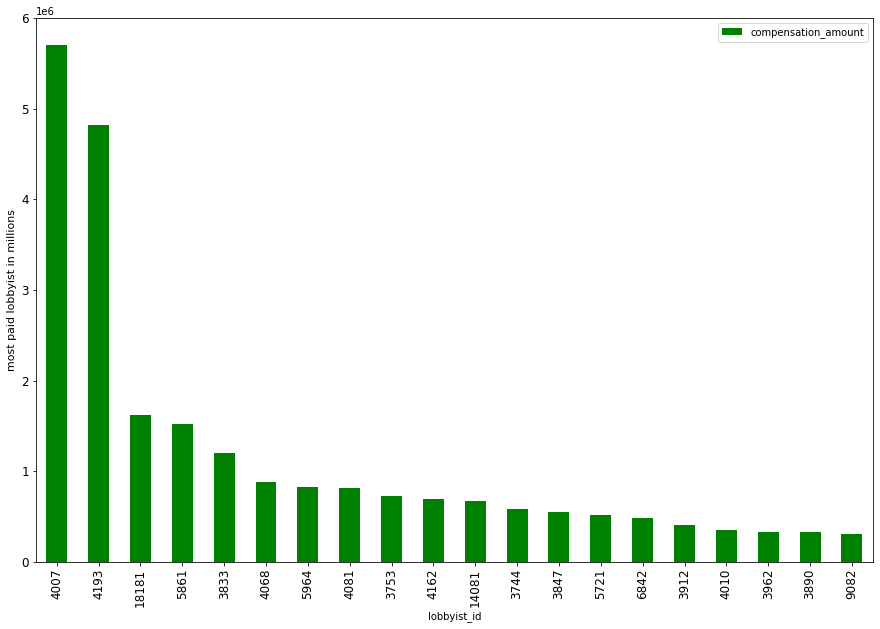

In [76]:
# plotting as a bar chart

lobbyist_most_pay_chart = most_pay_lobbyist.plot.bar(x = 'lobbyist_id', y = 'compensation_amount',figsize = (15,10), color = 'g', fontsize = 12)
plt.ylim(0,6000000)
plt.ylabel("most paid lobbyist in millions", fontsize =11)

## Which politician is receiving the most lobbying funds? - Contribution table

In [ ]:
compensation_5y_df.info()

## What companies spend the most money lobbying? - Compensation table

In [ ]:
compensation_5y_df.head()

In [ ]:
#compensation_df['amount'] = compensation_df['compensation_amount'].astype(float)
companies_most_funds = compensation_5y_df.groupby(["client_name"])["compensation_amount"].sum()
companies_high = companies_most_funds.sort_values(ascending=False)
companies_high =companies_high.head(30)

companies_high

Text(0, 0.5, 'companies_high')

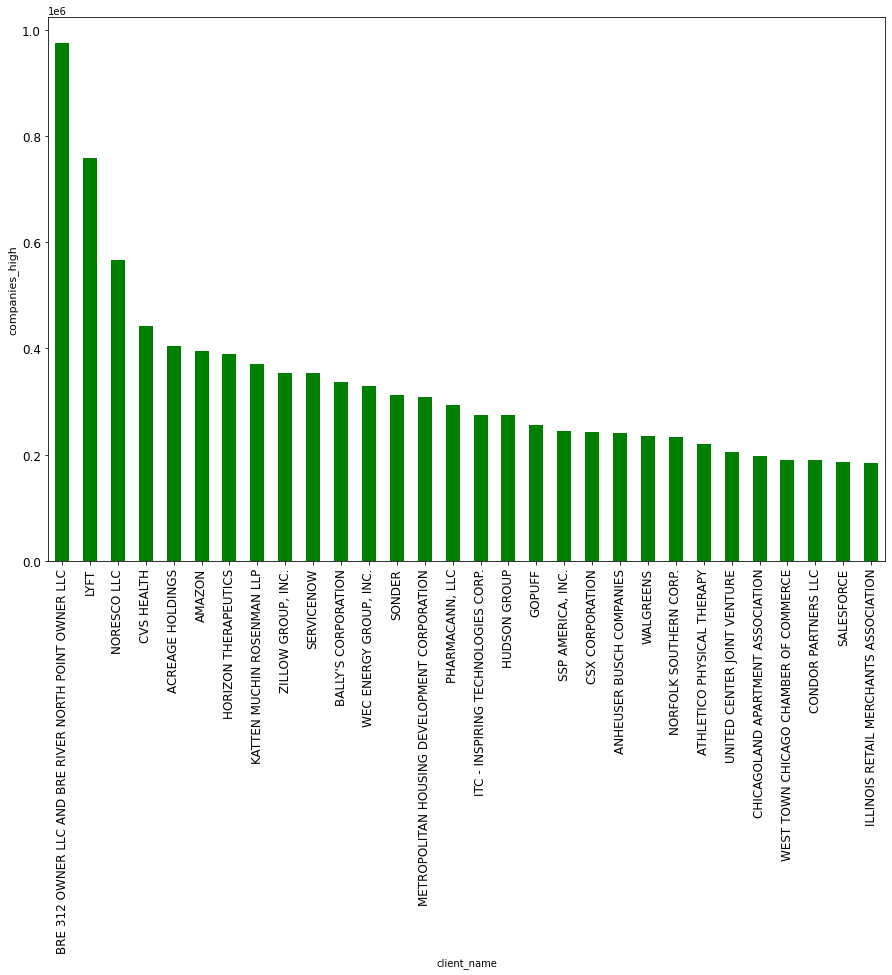

In [77]:
plot_pandas = companies_high.plot.bar(figsize = (15,10), color = 'g', fontsize = 12)
plt.ylabel("companies_high", fontsize =11)

# Creating JSON file for Leaflet Map of Lobbyists

In [ ]:
# How many coordinates are missing from final lobbyists dataframe?
lobbyist_final_df.count()

In [ ]:
# Drop records without coordinates

lobbyist_map_df = lobbyist_final_df.dropna()
lobbyist_map_df.count()

In [ ]:
# Converting final lobbyist dataframe to JavaSript array of objects for Leaflet

lobbyist_df_to_json_dict = lobbyist_map_df.to_dict(orient='records')
#lobbyist_df_to_json_dict

In [ ]:
# Write JavaScript array to file
with open("data/lobbyists.json", "w") as outfile:
    json.dump(lobbyist_df_to_json_dict, outfile)

In [ ]:
# how many coordinates are missing from final compensation dataframe?
compensation_5y_df.count()

In [ ]:
# drop records without coords
compensation_5y_df = compensation_5y_df.dropna()
compensation_5y_df.count()

In [ ]:
# converting compensation DF to dict, converting date type to formatted string

compensation_5y_df['period_start'] = compensation_5y_df['period_start'].dt.strftime('%m-%d-%y')
compensation_5y_df['period_end'] = compensation_5y_df['period_end'].dt.strftime('%m-%d-%y')

compensation_df_to_json_dict = compensation_5y_df.to_dict(orient='records')

In [ ]:
compensation_df_to_json_dict

In [ ]:
# Write DF to json

with open("data/compensation.json", "w") as outfile:
    json.dump(compensation_df_to_json_dict, outfile)